In [1]:
%matplotlib inline   

import numpy as np

import scipy.stats as stats
from scipy.stats import cauchy, uniform

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot formatting
#sns.set_context("talk")


maximum =  65.84493816883241
minimum =  -59.716226056470816


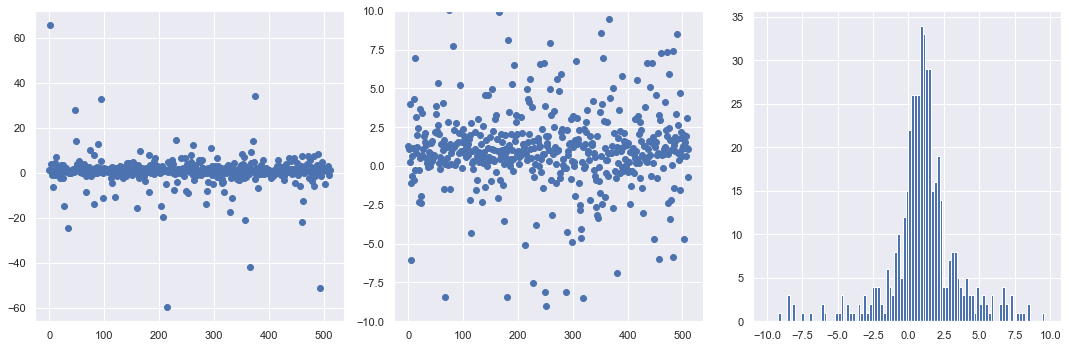

In [2]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Generate num_pts random numbers distributed according to dist and plot 
num_pts = 512
x_pts = np.arange(num_pts)

# Distribution knowing where the source is: scipy.stats.cauchy(loc, scale)
dist = cauchy(x0_true, y0_true)
dist_pts = dist.rvs(num_pts)  

# Make some plots!
fig = plt.figure(figsize=(15,5))

# First plot all the points, letting it autoscale the counts
ax_1 = fig.add_subplot(1,3,1)
ax_1.scatter(x_pts, dist_pts)  

# Repeat but zoom in to near the origin
ax_2 = fig.add_subplot(1,3,2)
ax_2.scatter(x_pts, dist_pts)
ax_2.set_ylim(-10.,10.)

# Finally make a zoomed-in histogram
ax_3 = fig.add_subplot(1,3,3)
out = ax_3.hist(dist_pts, bins=np.arange(-10., 10., 0.2))

# Print out the numerical limits (max and min)
print('maximum = ', np.amax(dist_pts))
print('minimum = ', np.amin(dist_pts))

fig.tight_layout()

maximum =  99.88764165438474
minimum =  -1974.903874638224


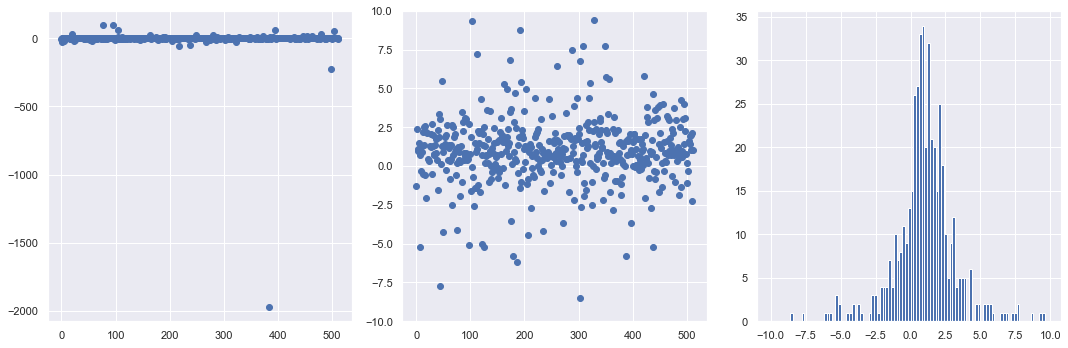

In [3]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Generate num_pts random numbers distributed according to dist and plot 
num_pts = 512
x_pts = np.arange(num_pts)

# Uniform distribution in theta: uniform(a,b) in [a, a+b]
theta_dist = uniform(-np.pi/2., np.pi)

#dist_pts_alt = ### Fill in formula here for x_k points
dist_pts_alt = x0_true + y0_true * np.tan(theta_dist.rvs(num_pts))

    
    
# Make some plots!
fig = plt.figure(figsize=(15,5))

# First plot all the points, letting it autoscale the counts
ax_1 = fig.add_subplot(1,3,1)
ax_1.scatter(x_pts, dist_pts_alt)  

# Repeat but zoom in to near the origin
ax_2 = fig.add_subplot(1,3,2)
ax_2.scatter(x_pts, dist_pts_alt)
ax_2.set_ylim(-10.,10.)

# Finally make a zoomed-in histogram
ax_3 = fig.add_subplot(1,3,3)
out = ax_3.hist(dist_pts_alt, bins=np.arange(-10., 10., 0.2))

# Print out the numerical limits (max and min)
print('maximum = ', np.amax(dist_pts_alt))
print('minimum = ', np.amin(dist_pts_alt))

fig.tight_layout()

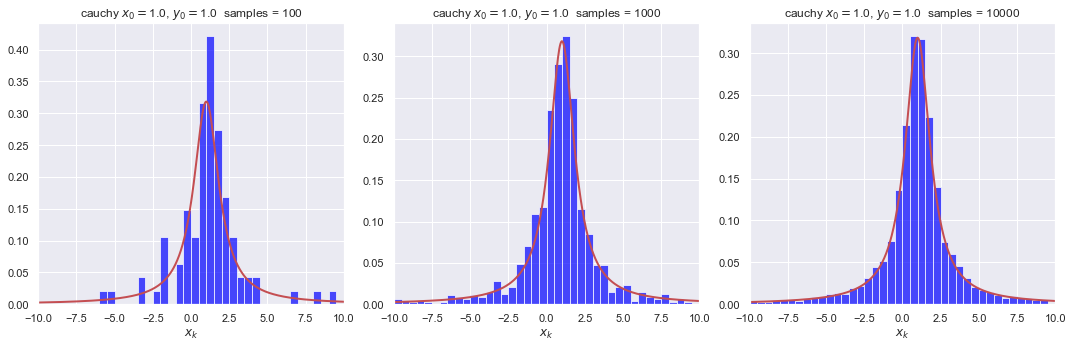

In [4]:
def dist_hist_plot(ax, name, x_dist, dist, num_samples, bin_width, 
                   x_label=None):
    """
       Plot a pdf and histogram of samples with specified list of points to 
       be plotted, which sets the range of the histogram, and width of bins.
       
       Parameters:
       -----------
       ax (matplotlib axis): axis for the histogram
       name (string): description of 
       x_dist (ndarray): points to be plotted 
       dist (scipy.stats distribution): pdf to make draws from
       num_samples (int): number of draws to make from dist
       bin_width (float): width of each bin to be plotted
       x_label (string): label for the x-axis
    """
    samples = dist.rvs(size=num_samples)   # generate num_samples draws
    bin_bounds = np.arange(x_dist[0], x_dist[-1], bin_width)
    count, bins, ignored = ax.hist(samples, bins=bin_bounds, density=True,
                                   color='blue', alpha=0.7)
    ax.plot(x_dist, dist.pdf(x_dist), linewidth=2, color='r')
    title_string = name + f'  samples = {num_samples:d}'
    ax.set_title(title_string)
    ax.set_xlim(x_dist[0], x_dist[-1])
    if x_label:
        ax.set_xlabel(x_label)
    
x_max = 10.    
x_dist = np.linspace(-x_max, x_max, 500)
name = rf'cauchy $x_0=${x0_true:1.1f}, $y_0=${y0_true:1.1f}'
fig = plt.figure(figsize=(15,5))
bin_width = 0.5
x_label = r'$x_k$'

num_samples = 100
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_1 = fig.add_subplot(1, 3, 1)
dist_hist_plot(ax_1, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

num_samples = 1000
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_2 = fig.add_subplot(1, 3, 2)
dist_hist_plot(ax_2, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

num_samples = 10000
cauchy_dist = stats.cauchy(x0_true, y0_true)
ax_3 = fig.add_subplot(1, 3, 3)
dist_hist_plot(ax_3, name, x_dist, cauchy_dist, num_samples, 
               bin_width, x_label)

fig.tight_layout()

In [5]:
def log_prior(x0, y0_true, x_min=-4., x_max=+4.):
    """
    Log uniform prior from x_min to x_max.  Not normalized!
    """
    if (x0 > x_min) and (x0 < x_max):
        return 0.
    else:
        return -np.inf    # log(0) = -inf
    
def log_likelihood(x0, y0_true, dist_pts, N_max): 
    """
    Log likelihood for the first N_max points of the dist_pts array,
    assuming independent.  Not normalized!  
    """
    L_pts = -np.log(y0_true**2 + (dist_pts[0:N_max] - x0)**2)
    return sum(L_pts)

def posterior_calc(x0_pts, y0_true, dist_pts, N_max, x0_min=-4., x0_max=+4.):
    """
    Calculate the posterior for a set of x0_pts given y0 (y0_true) and a
    list of N_max x_k observations (dist_pts).
    """    
    log_L_pts = [log_likelihood(x0, y0_true, dist_pts, N_max) \
                 for x0 in x0_pts]
    log_L_pts -= np.amax(log_L_pts)  # subtract maximum of log likelihood

    log_prior_pts = [log_prior(x0, y0_true, x0_min, x0_max) \
                     for x0 in x0_pts]

    posterior_pts = np.exp(log_prior_pts + log_L_pts)
    return posterior_pts
  
def lighthouse_stats(dist_pts, N_max, x0_pts, posterior_pts):
    """
    Given an array of N_max observed detection points (dist_pts) and a
    posterior pdf (posterior_pts) for an array of x0 points (x0_pts), return
    the mean of dist_pts and the mode and mean of the posterior. 
    """
    mean_dist = np.mean(dist_pts[0:N_max])
    max_posterior = x0_pts[np.argmax(posterior_pts)]
    mean_posterior = np.sum(x0_pts * posterior_pts) / np.sum(posterior_pts)
    return mean_dist, max_posterior, mean_posterior

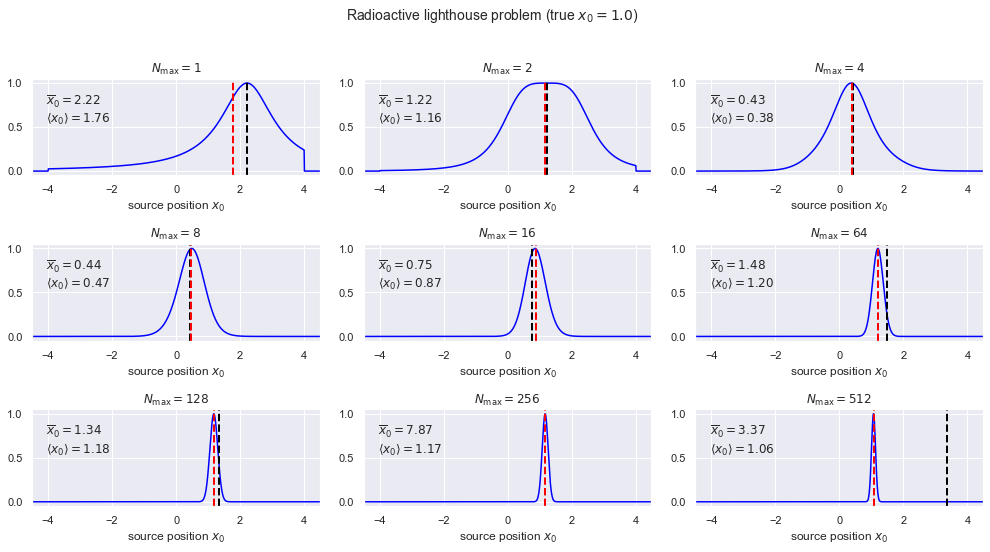

In [6]:
# True location of the radioactive source
x0_true = 1.
y0_true = 1.

# Distribution knowing where the source is: scipy.stats.cauchy(loc, scale)
num_pts = 512  # number of observations
dist = cauchy(x0_true, y0_true)   # sampling a Cauchy distribution directly
dist_pts = dist.rvs(num_pts)      # generate {x_k} for k = 1 to num_pts 

# Choose the set of N_max to be plotted (multiple of 3, up to num_pts)
N_max_values = [1, 2, 4, 8, 16, 64, 128, 256, 512]  

x0_min = -4.  # lower bound for prior
x0_max = +4.  # upper bound for prior
x0_pts = np.arange(-4.5, 4.5, 0.01)

fig = plt.figure(figsize=(14, 2.5*len(N_max_values)/3))

# Step through counter (k) for each N_max entry in N_max_values
for k, N_max in enumerate(N_max_values):  
    posterior_pts = posterior_calc(x0_pts, y0_true, dist_pts, N_max)
    mean_dist, max_posterior, mean_posterior = lighthouse_stats(dist_pts, 
                                                N_max, x0_pts, posterior_pts)
 
    # now make the plots: 3 to a row
    ax = fig.add_subplot(int(len(N_max_values)/3), 3, k+1)  
    ax.set_xlabel(r'source position $x_0$') 
    #ax.set_yticks([])  # turn off the plotting of ticks on the y-axis
    ax.plot(x0_pts, posterior_pts, color='blue')
    ax.set_title(rf'$N_{{\rm max}} = {N_max:d}$')
    ax.axvline(mean_dist, 0., 1.1, color='black', linestyle="--", lw=2)
    ax.axvline(mean_posterior, 0., 1.1, color='red', linestyle="--", lw=2)
    ax.set_xlim(np.min(x0_pts), np.max(x0_pts))
    
    stats_title = rf'$\overline{{x}}_0 = {mean_dist:.2f}$' + '\n' \
                  rf'$\langle x_0 \rangle = {mean_posterior:.2f}$'
    ax.annotate(stats_title, 
                xy=(0.05,0.85), xycoords='axes fraction', 
                horizontalalignment='left',verticalalignment='top')

figure_title = rf'Radioactive lighthouse problem (true $x_0 = {x0_true:.1f}$)'
fig.suptitle(figure_title, y=1.02, fontsize=14)

fig.tight_layout()

In [7]:
%%html

<style> 
 table { width:90% !important; }
 table td, table th, table tr {border: 2px solid black !important; 
                               text-align:center !important;
                               font-size: 20px;}
</style>